<a href="https://colab.research.google.com/github/LamQuynhf/CS114.K21.KHTN/blob/master/predict_data_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pickle

## Lấy dữ liệu xuống
Dùng lệnh wget 

In [0]:
data=!wget http://cs.uit.edu.vn/data2.txt

In [0]:

data=pd.read_csv('data2.txt')
data.columns=['x','y']
print(data.head())
# print(data['y'])

         x         y
0  1954367  0.152648
1  3734185  0.298548
2  5839301  0.460480
3  6343427  0.527977
4  1355574  0.098012


## Chon model
### Bài toán với đầu vào là các số nguyên và đầu ra là các giá trị liên tục, nên chọn Linear Regreesion một biến

## Train model
###Sử dụng thư viện sklearn với hàm .fit()

##Predict dữ liệu
###Sử dụng thư viện sklearn với hàm .predict với đầu vào là giá trị kiểm thử

##Đánh giá model
###Sử dụng hàm score để đánh giá kết quả dự đoán model với đầu vào là tập kiểm thử và nhãn của nó.
###được xác định bằng (1 - u/v) trong đó u=((ytrue - ypred) ** 2).sum()
###,v=((ytrue - ytrue.mean()) ** 2).sum()
### với v xác định thì nếu ypred càng gần ytrue thì u càng nhỏ, dẫn tới u/v càng nhỏ, dẫn tới score() sẽ tăng => model được xây dựng tốt khi có score~0,997


56891 56891 14223 14223
0.9975476238521903


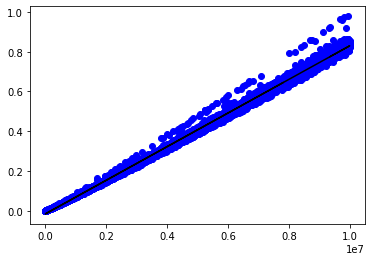

In [0]:

model=LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(data['x'], data['y'], test_size=0.2, random_state=42)
x_train= np.array(x_train).reshape(-1, 1)
y_train= np.array(y_train).reshape(-1, 1)
x_test = np.array(x_test).reshape(-1, 1)
y_test=np.array(y_test).reshape(-1,1)
print(len(x_train),len(y_train),len(x_test),len(y_test))
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print(model.score(x_test,y_test))
# accuracy_score(y_test, y_predict, normalize=False)
# accuracy_score(y_test, y_predict) 
plt.scatter(x_test, y_test, color ='b') 
plt.plot(x_test, y_predict, color ='k') 
plt.show() 

##Lưu model


In [0]:
filename='Regressor_model.sav'

In [0]:
pickle.dump(model, open(filename, 'wb'))


In [0]:
load_lr_model =pickle.load(open(filename, 'rb'))
load_lr_model.coef_

array([[8.45531952e-08]])

##Đánh giá lại model với dataset mới

In [0]:
new_data=!wget  http://cs.uit.edu.vn/data3.txt

In [0]:
new_data=pd.read_csv('data3.txt')
new_data.columns=['x3','y3']
print(new_data.head())

         x3       y3
0  37395246  3.92089
1  36610827  3.21540
2  29555651  2.54506
3  25928216  2.21831
4  30423112  2.61376


In [0]:
x_test3=np.array(new_data['x3']).reshape(-1,1)
y_test3=np.array(new_data['y3']).reshape(-1,1)

In [0]:
y_predict3=model.predict(x_test3)

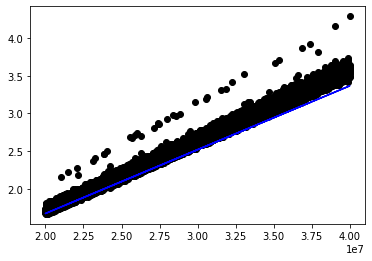

0.9285625391530936


In [0]:
plt.scatter(x_test3,y_test3,color='k')
plt.plot(x_test3,y_predict3,color='b')
plt.show()
print(model.score(x_test3,y_test3))

##Đánh giá:
###Kết quả tệ hơn data cũ nhưng vẫn tốt, vấn đề ở đây là do dataset mới đưa vào không phù hợp với trainset


##Xây dựng model mới và ứng dụng dự báo mới sử dụng phương pháp tăng số features đã gợi ý trên lớp.

In [0]:
def agument_data(trainX):
    X = []
    for data in trainX:
        x = data[0]**2
        y = data[0]*math.log(data[0])
        data=list(data)
        data.append(x)
        data.append(y)
        X.append(data)
    return np.array(X)

In [0]:
trainx=np.array(data['x']).reshape(-1,1)
trainx=agument_data(trainx)
print(trainx)
trainy=np.array(data['y']).reshape(-1,1)

[[1.95436700e+06 3.81955037e+12 2.83101335e+07]
 [3.73418500e+06 1.39441376e+13 5.65095715e+07]
 [5.83930100e+06 3.40974362e+13 9.09770200e+07]
 ...
 [9.83736400e+06 9.67737305e+13 1.58398268e+08]
 [9.46659300e+06 8.96163830e+13 1.52064531e+08]
 [4.08080100e+06 1.66529368e+13 6.21171524e+07]]


In [0]:
xtrain,xtest,ytrain,ytest=train_test_split(trainx,trainy,test_size=0.2,random_state=42)
new_model=LinearRegression()
new_model.fit(xtrain,ytrain)
predicty=new_model.predict(xtest)


In [0]:
print(new_model.score(xtest,ytest))



0.9979113745801343


##model mới có hiệu suất cao hơn model cũ
###Ở trường hợp này với nhiều feature hơn thì sự tương quan giữa label và feature sẽ tăng, dẫn đến việc dự đoán kết quả sẽ tốt hơn.